In [ ]:
import pandas as pd

df = pd.read_csv('/content/cleaned_forest_fire_data_no_missing_names.csv')

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso                                 4528 non-null   object 
 1   umd_tree_cover_loss__year           4528 non-null   int64  
 2   umd_tree_cover_loss__ha             4528 non-null   float64
 3   umd_tree_cover_loss_from_fires__ha  4528 non-null   float64
 4   alert__count_sum                    4528 non-null   float64
 5   area__ha                            4528 non-null   float64
 6   name                                4528 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 247.8+ KB


,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,umd_tree_cover_loss_from_fires__ha,alert__count_sum,area__ha,name
0,AFG,2001,88.092712,12.249294,0.0,5.150857e+08,Afghanistan
1,AGO,2001,101220.621525,888.694561,0.0,1.118642e+09,Angola
2,AIA,2001,3.878461,0.000000,0.0,7.346576e+04,Anguilla
3,ALA,2001,396.934826,8.129861,0.0,1.205146e+06,Åland
4,ALB,2001,3729.021031,754.554994,0.0,2.298830e+07,Albania


In [ ]:

df.describe()


,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,umd_tree_cover_loss_from_fires__ha,alert__count_sum,area__ha
count,4528.000000,4.528000e+03,4.528000e+03,4528.000000,4.528000e+03
mean,2011.852032,1.077028e+05,3.050676e+04,370.764355,5.385886e+08
std,6.623499,4.516283e+05,2.594001e+05,2310.595883,1.525752e+09
min,2001.000000,0.000000e+00,0.000000e+00,0.000000,4.850437e+03
25%,2006.000000,8.092935e+01,1.631421e+00,0.000000,1.091703e+07
50%,2012.000000,3.627462e+03,7.706673e+01,0.000000,8.926985e+07
75%,2018.000000,4.141752e+04,9.637483e+02,3.000000,4.048342e+08
max,2023.000000,8.570168e+06,7.757410e+06,41552.000000,1.351564e+10


In [ ]:

df.isnull().sum()


,0
iso,0
umd_tree_cover_loss__year,0
umd_tree_cover_loss__ha,0
umd_tree_cover_loss_from_fires__ha,0
alert__count_sum,0
area__ha,0
name,0


In [ ]:
import plotly.express as px


df['fire_loss_percentage'] = (df['umd_tree_cover_loss_from_fires__ha'] / df['umd_tree_cover_loss__ha']) * 100


fire_loss_country = df.groupby('iso').agg({
    'fire_loss_percentage': 'mean',
    'name': 'first'
}).reset_index()

fig = px.choropleth(fire_loss_country, locations="iso",
                    color="fire_loss_percentage",
                    hover_name="name",
                    color_continuous_scale="Oranges",
                    title="Proportion of Tree Cover Loss from Fires (%)")

fig.show()


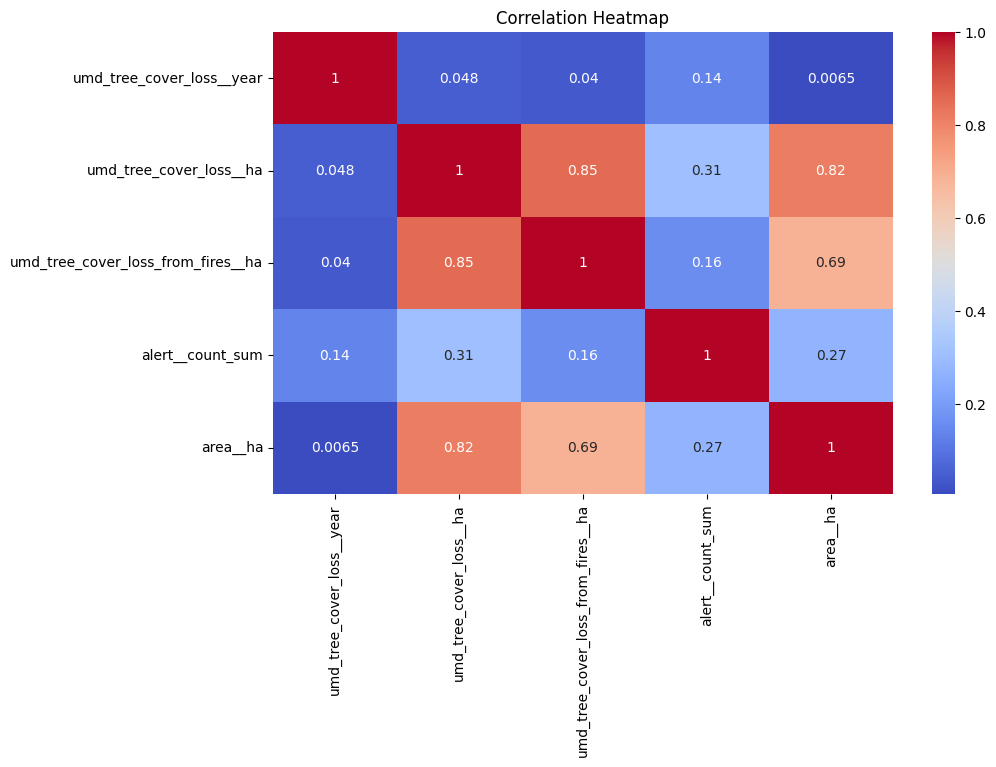

In [ ]:


corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:

print("Country Counts:")
print(df['name'].value_counts())

print("\nYear Counts:")
print(df['umd_tree_cover_loss__year'].value_counts())


Country Counts:
name
Sri Lanka                      23
Mongolia                       23
Moldova                        23
Madagascar                     23
Mexico                         23
                               ..
Saudi Arabia                    2
Sao Tome and Principe           1
French Southern Territories     1
Micronesia                      1
United Arab Emirates            1
Name: count, Length: 214, dtype: int64

Year Counts:
umd_tree_cover_loss__year
2012    208
2002    205
2001    205
2013    204
2014    203
2009    202
2005    201
2010    201
2004    201
2006    201
2008    199
2011    199
2007    197
2003    196
2019    193
2017    192
2018    192
2020    192
2023    192
2021    191
2022    189
2016    183
2015    182
Name: count, dtype: int64


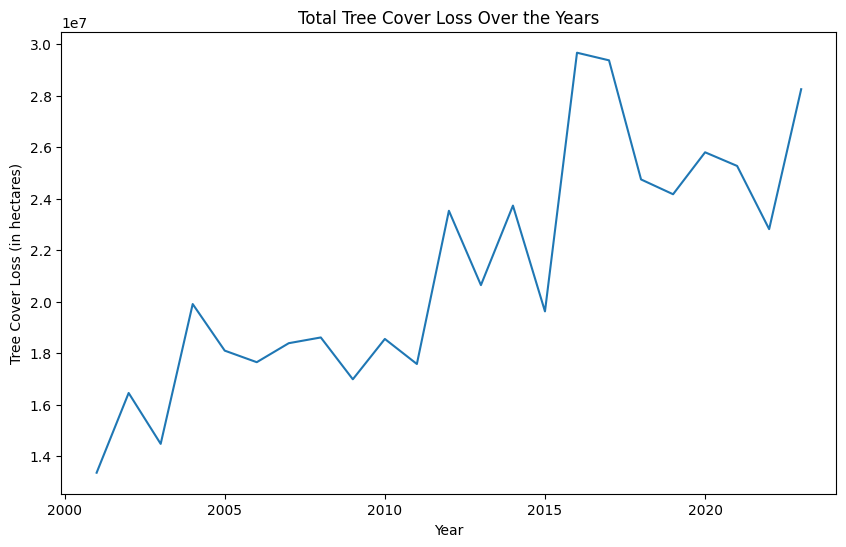

In [ ]:

yearly_loss = df.groupby('umd_tree_cover_loss__year')['umd_tree_cover_loss__ha'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='umd_tree_cover_loss__year', y='umd_tree_cover_loss__ha', data=yearly_loss)
plt.title('Total Tree Cover Loss Over the Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (in hectares)')
plt.show()


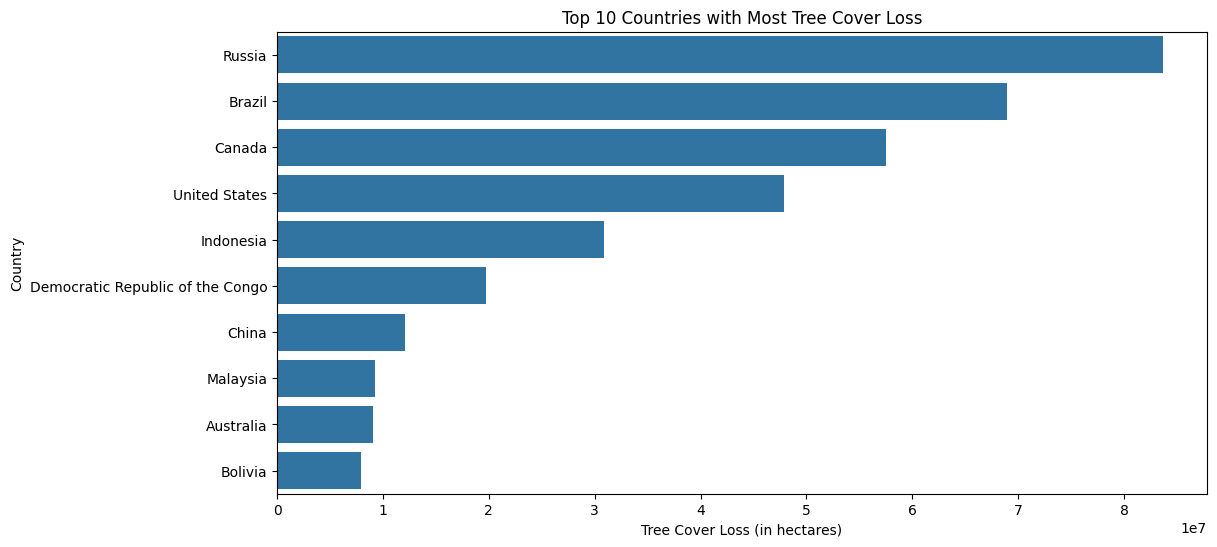

In [ ]:

country_loss = df.groupby('name')['umd_tree_cover_loss__ha'].sum().reset_index()


top_10_countries = country_loss.sort_values(by='umd_tree_cover_loss__ha', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='umd_tree_cover_loss__ha', y='name', data=top_10_countries)
plt.title('Top 10 Countries with Most Tree Cover Loss')
plt.xlabel('Tree Cover Loss (in hectares)')
plt.ylabel('Country')
plt.show()


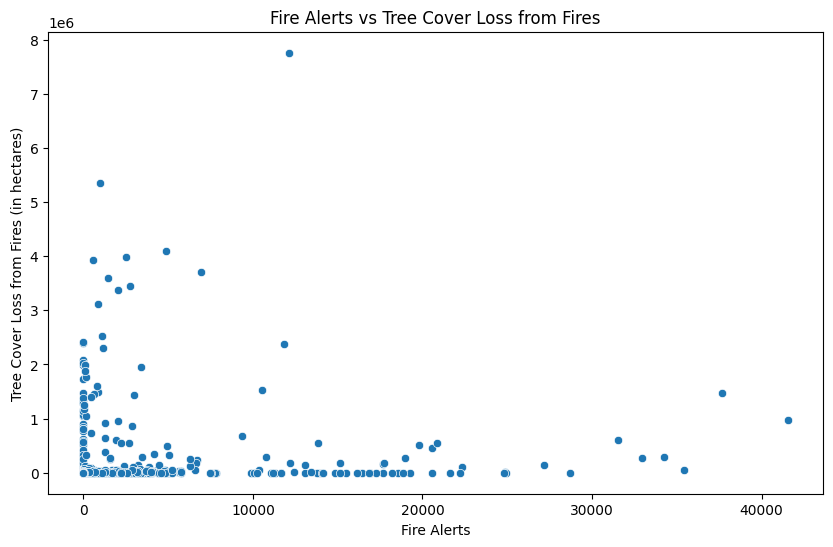

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alert__count_sum', y='umd_tree_cover_loss_from_fires__ha', data=df)
plt.title('Fire Alerts vs Tree Cover Loss from Fires')
plt.xlabel('Fire Alerts')
plt.ylabel('Tree Cover Loss from Fires (in hectares)')
plt.show()


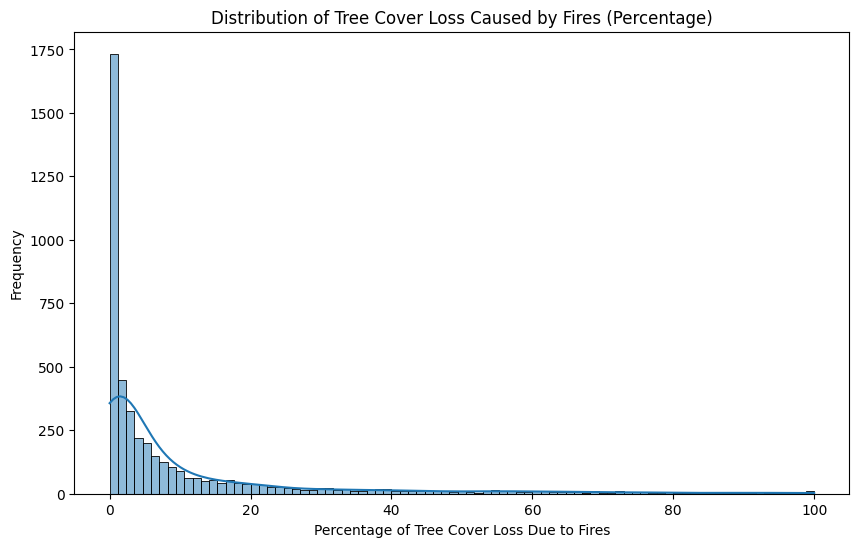

In [ ]:

df['fire_loss_percentage'] = (df['umd_tree_cover_loss_from_fires__ha'] / df['umd_tree_cover_loss__ha']) * 100


df['fire_loss_percentage'].describe()


plt.figure(figsize=(10, 6))
sns.histplot(df['fire_loss_percentage'], kde=True)
plt.title('Distribution of Tree Cover Loss Caused by Fires (Percentage)')
plt.xlabel('Percentage of Tree Cover Loss Due to Fires')
plt.ylabel('Frequency')
plt.show()


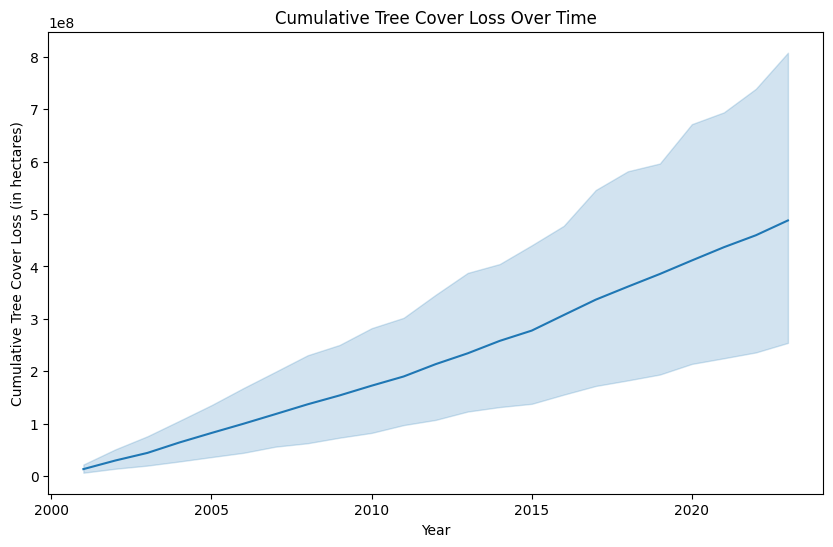

In [ ]:

df['cumulative_loss'] = df.groupby('iso')['umd_tree_cover_loss__ha'].cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(x='umd_tree_cover_loss__year', y='cumulative_loss', data=df, estimator='sum')
plt.title('Cumulative Tree Cover Loss Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (in hectares)')
plt.show()


In [ ]:
import plotly.express as px

tree_cover_loss_country = df.groupby('iso').agg({
    'umd_tree_cover_loss__ha': 'sum',
    'name': 'first'
}).reset_index()

fig = px.choropleth(tree_cover_loss_country, locations="iso",
                    color="umd_tree_cover_loss__ha",
                    hover_name="name",
                    color_continuous_scale="Blues",
                    title="Global Tree Cover Loss Intensity (Hectares)")

fig.show()


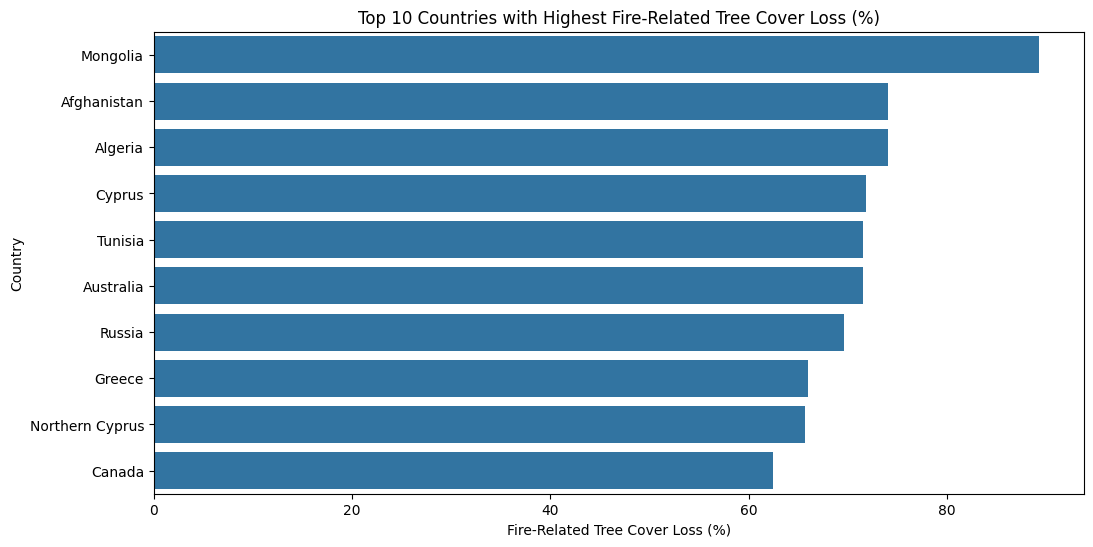

In [ ]:

top_fire_loss_countries = df.groupby('name').agg({
    'umd_tree_cover_loss__ha': 'sum',
    'umd_tree_cover_loss_from_fires__ha': 'sum'
}).reset_index()


top_fire_loss_countries['fire_loss_percentage'] = (top_fire_loss_countries['umd_tree_cover_loss_from_fires__ha'] /
                                                   top_fire_loss_countries['umd_tree_cover_loss__ha']) * 100


top_10_fire_loss = top_fire_loss_countries.sort_values(by='fire_loss_percentage', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x='fire_loss_percentage', y='name', data=top_10_fire_loss)
plt.title('Top 10 Countries with Highest Fire-Related Tree Cover Loss (%)')
plt.xlabel('Fire-Related Tree Cover Loss (%)')
plt.ylabel('Country')
plt.show()


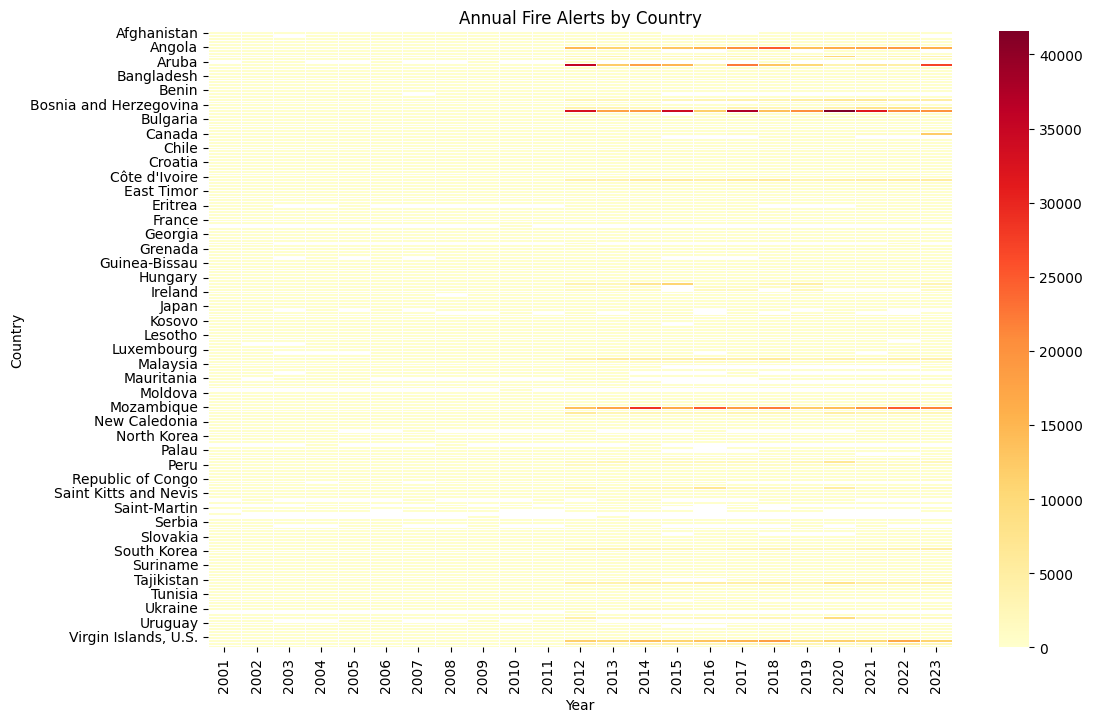

In [ ]:

heatmap_data = df.pivot_table(index='name', columns='umd_tree_cover_loss__year', values='alert__count_sum', aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Annual Fire Alerts by Country')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


In [ ]:


import plotly.express as px


fire_alerts_country = df.groupby('iso').agg({
    'alert__count_sum': 'sum',
    'name': 'first'
}).reset_index()


fig = px.choropleth(fire_alerts_country, locations="iso",
                    color="alert__count_sum",
                    hover_name="name",
                    color_continuous_scale="YlOrRd",
                    title="Global Fire Alert Intensity")

fig.show()


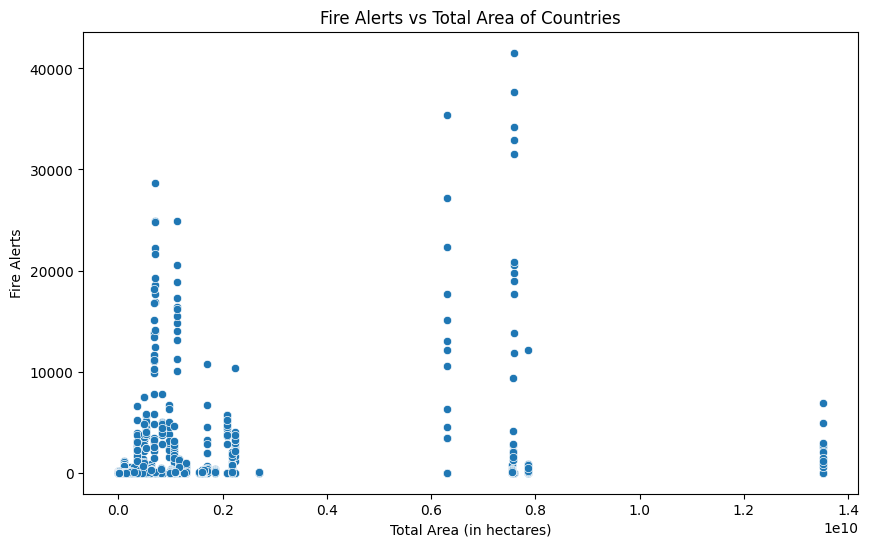

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area__ha', y='alert__count_sum', data=df)
plt.title('Fire Alerts vs Total Area of Countries')
plt.xlabel('Total Area (in hectares)')
plt.ylabel('Fire Alerts')
plt.show()


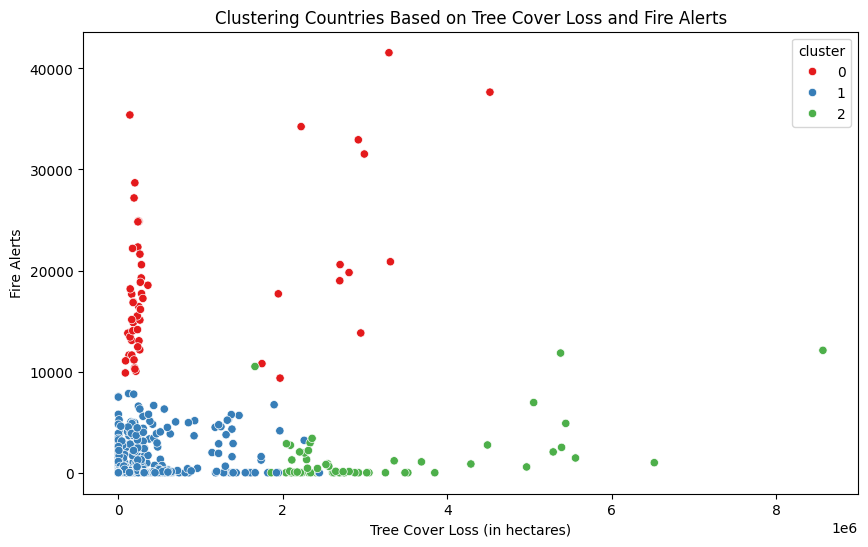

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['umd_tree_cover_loss__ha', 'umd_tree_cover_loss_from_fires__ha', 'alert__count_sum']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='umd_tree_cover_loss__ha', y='alert__count_sum', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Countries Based on Tree Cover Loss and Fire Alerts')
plt.xlabel('Tree Cover Loss (in hectares)')
plt.ylabel('Fire Alerts')
plt.show()
